# Plot Gene Set Overlap
Use `micromamba activate benchmark_env`.

Rows: 19934 Columns: 11
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): database, model, descr
dbl (8): ncurated, nllm, ninter, ndup, generatio, bgratio, p_val, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "gpt-3.5-turbo-0125"


Saving 7 x 7 in image


[1] "gpt-4o-2024-05-13"


Saving 7 x 7 in image


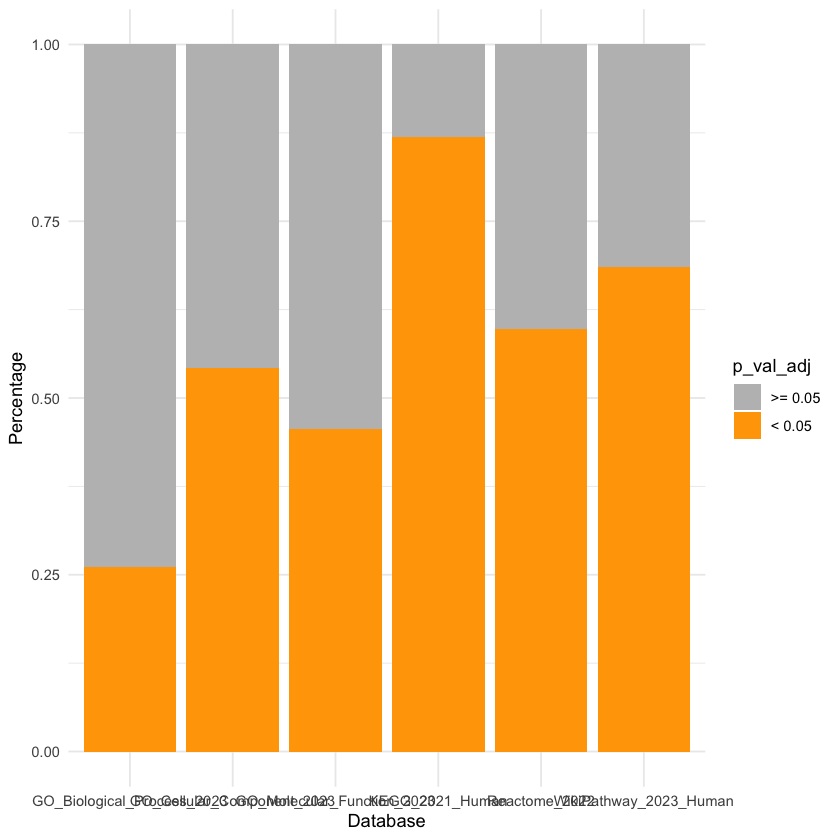

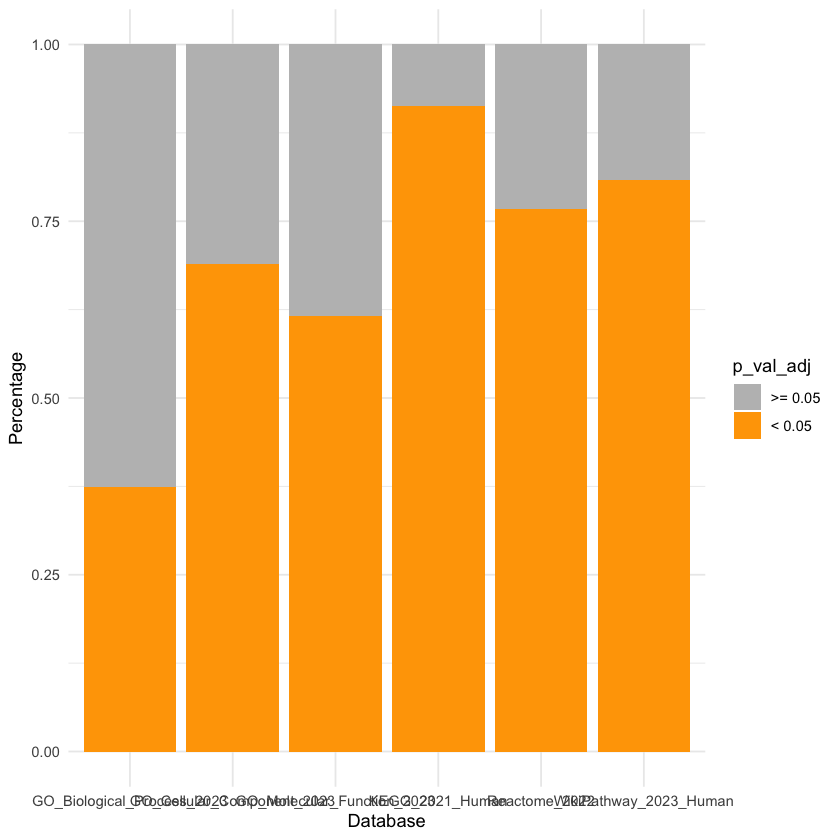

In [2]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)

df.all.models <- readr::read_tsv("genes_overlap.tsv")

for (cur.model in unique(df.all.models$model)) {
    print(cur.model)
    df <- df.all.models |> dplyr::filter(model == cur.model)
    
    # Group by 'database' and calculate the fraction of p_val_adj < 0.01
    df_summary <- df %>%
      group_by(database) %>%
      summarise(
        total = n(),
        less_than_0_05 = sum(p_val_adj < 0.001),
        greater_or_equal_0_05 = total - less_than_0_05
      ) %>%
      mutate(
        percent_less_than_0_05 = less_than_0_05 / total,
        percent_greater_or_equal_0_05 = greater_or_equal_0_05 / total
      ) %>%
      pivot_longer(cols = starts_with("percent"), names_to = "threshold", values_to = "percent") %>%
      mutate(threshold = factor(threshold, levels = c("percent_greater_or_equal_0_05", "percent_less_than_0_05")))
    
    # Plot the stacked bar plot
    fig <- ggplot(df_summary, aes(x = database, y = percent, fill = threshold)) +
      geom_bar(stat = "identity") +
      scale_fill_manual(values = c("percent_greater_or_equal_0_05" = "gray", "percent_less_than_0_05" = "orange"),
                        labels = c(">= 0.05", "< 0.05")) +
      labs(x = "Database", y = "Percentage", fill = "p_val_adj") +
      theme_minimal()

    print(fig)
    ggsave(fig, file=paste0(cur.model, ".pdf"))
}